<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj19-stellar-classification?scriptVersionId=193034643" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Stellar Classification</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

The aim of this project is to classify stars into different categories using their spectral data, focusing on identifying giants and dwarfs. The classification is based on absolute magnitude and B-V color index, which are key attributes in the Morgan–Keenan (MK) classification system. This project helps in understanding the characteristics and classification of stars in the stellar spectrum.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download vinesmsuic/star-categorization-giants-and-dwarfs -f  Star39552_balanced.csv

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs
License(s): other
  0%|                                                | 0.00/592k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 592k/592k [00:00<00:00, 75.0MB/s]


In [4]:
! unzip Star39552_balanced.csv.zip

Archive:  Star39552_balanced.csv.zip
  inflating: Star39552_balanced.csv  


In [5]:
df = pd.read_csv("Star39552_balanced.csv").copy()

# **Take a look at the data**
---

In [6]:
df.head(10)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
6,7.94,5.36,0.61,1.066,K0III,16.585825,0
7,6.81,13.13,1.04,1.030,K1III,17.401323,0
8,7.68,0.66,0.62,0.013,B2V:e,11.777719,1
9,8.78,8.26,1.14,0.682,G2IV,18.364899,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [8]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,30.449015,1.000000


In [9]:
df['TargetClass'].value_counts()

TargetClass
1    19776
0    19776
Name: count, dtype: int64

In [10]:
print(df.shape)

(39552, 7)


# **Exploratory Data Analysis**
---

**Univariate Analysis**

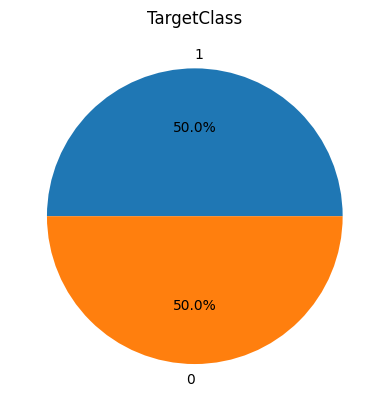

In [11]:
plt.pie(df['TargetClass'].value_counts(),labels=df['TargetClass'].value_counts().index, autopct='%1.1f%%')
plt.title('TargetClass')
plt.show()

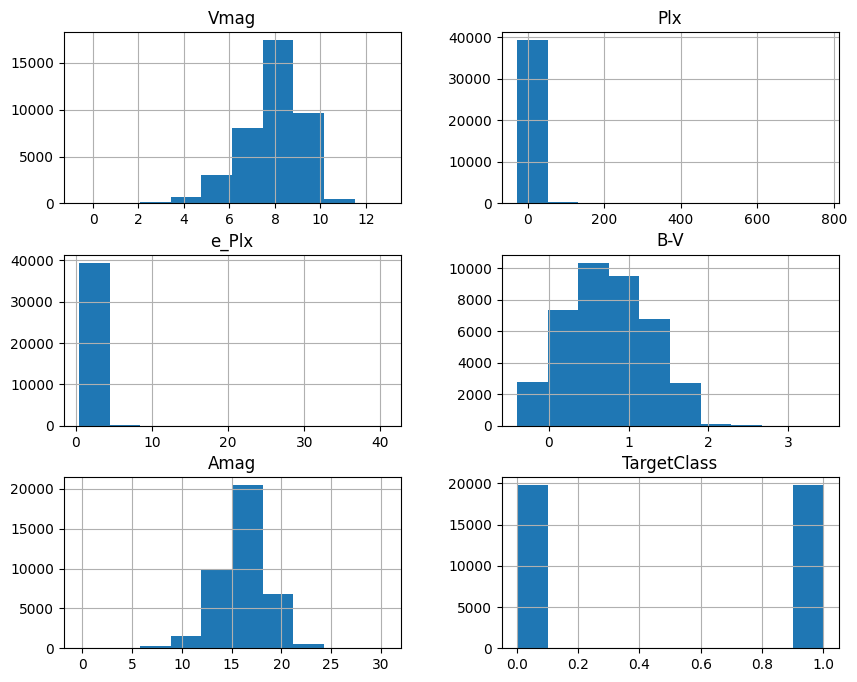

In [12]:
numerical_data = df.select_dtypes(include='number')

numerical_data.hist(figsize=(10,8))
plt.show()

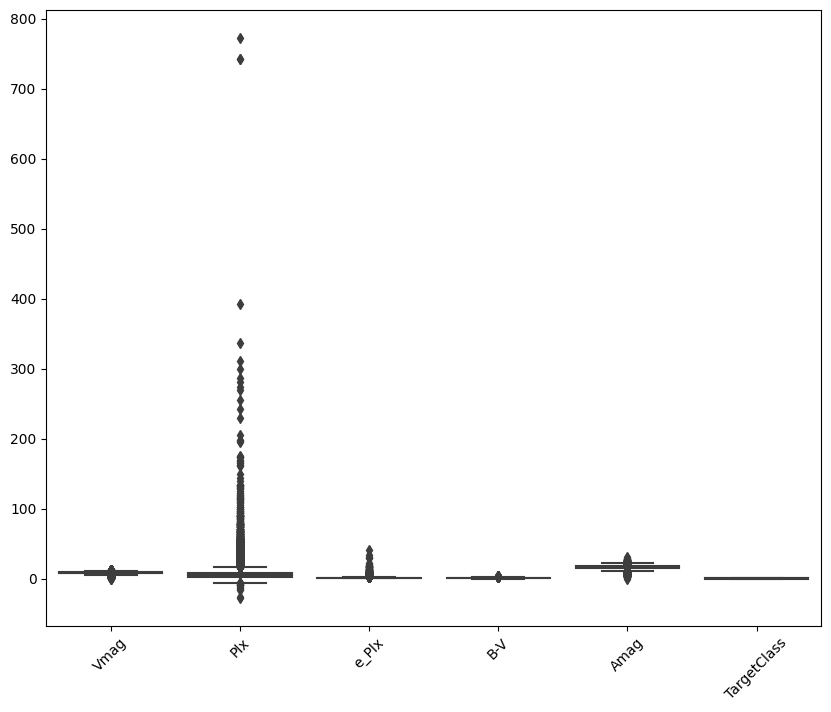

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(numerical_data)
plt.xticks(rotation = 45)
plt.show()

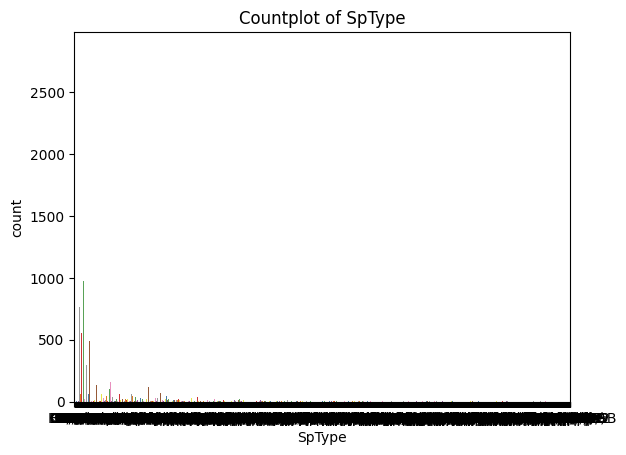

In [14]:
categorical_data = df.select_dtypes(exclude='number')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

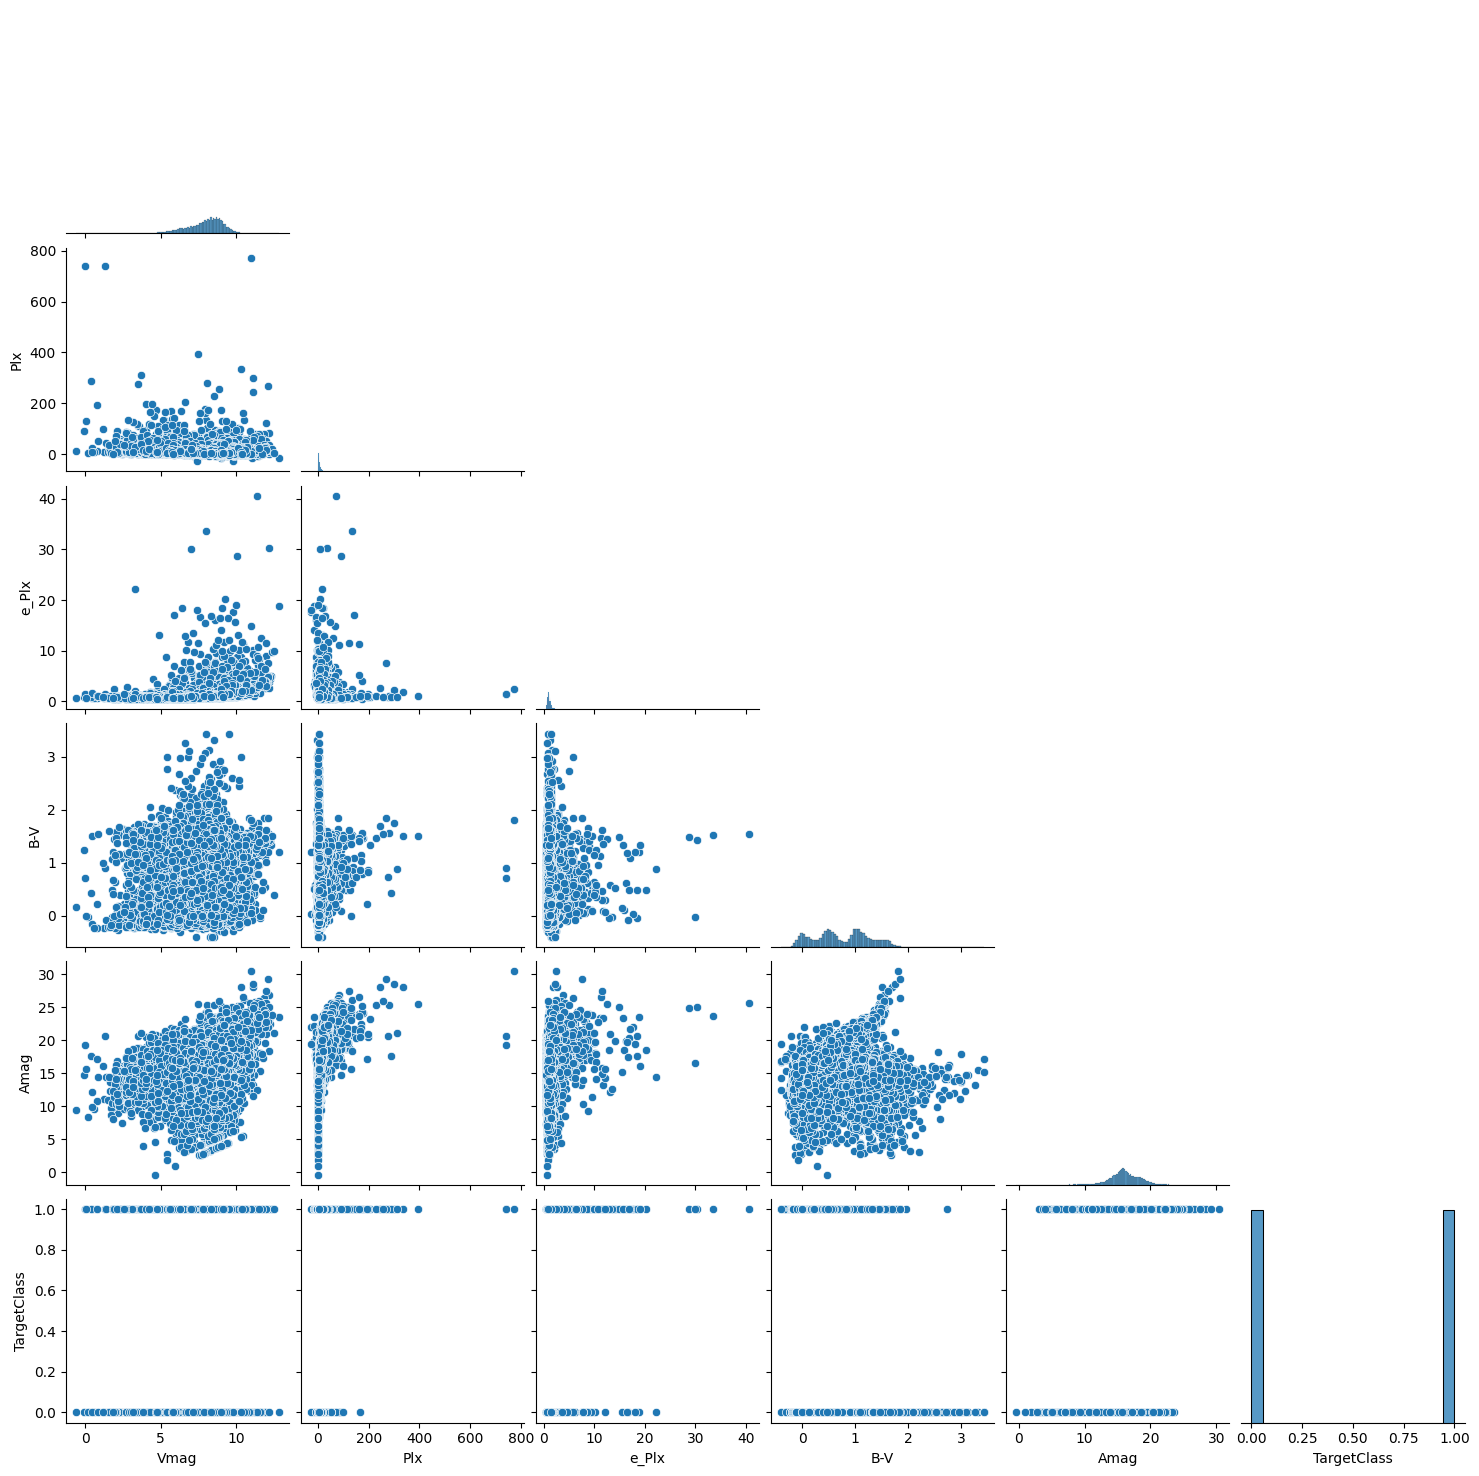

In [15]:
sns.pairplot(df, corner = True)
plt.show()

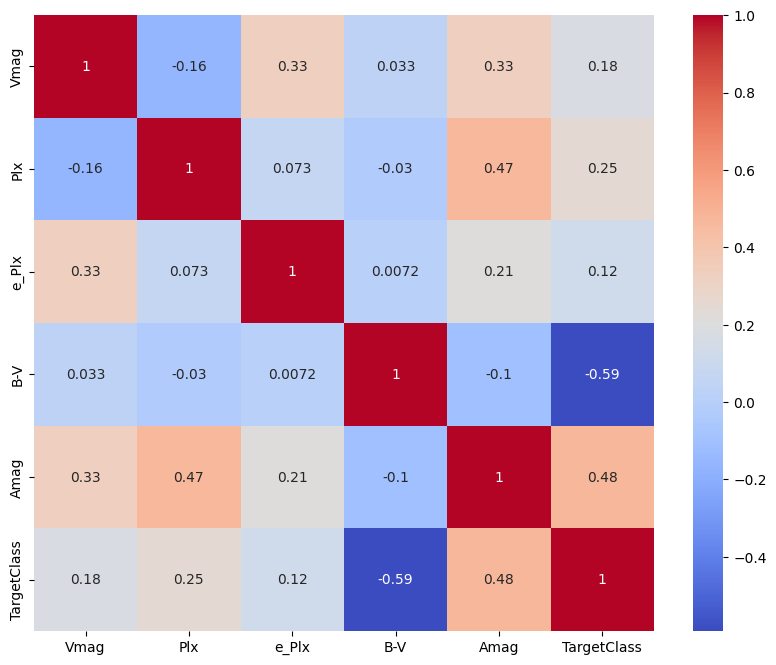

In [16]:
corr = df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap = 'coolwarm')
plt.show()

# **Data Cleaning**
---

**Formatting**

In [17]:
df['TargetClass'] = df['TargetClass'].astype('int')

In [18]:
df['TargetClass'].head()

0    1
1    0
2    1
3    0
4    1
Name: TargetClass, dtype: int64

**Handling Duplicate Rows**

In [19]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Vmag,0,0.0
Plx,0,0.0
e_Plx,0,0.0
B-V,0,0.0
SpType,0,0.0
Amag,0,0.0
TargetClass,0,0.0


In [21]:
total = df.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [22]:
df['SpType'].value_counts()

SpType
K0III           2841
K1III           1742
K2III           1479
G8III           1474
K3III           1097
                ... 
K0II-III:..        1
B8/9V:  B7/9       1
A5Vms...           1
F9III              1
A5III/IVm..        1
Name: count, Length: 2576, dtype: int64

In [23]:
import pandas as pd

def combine_low_frequency_categories(df, column_name, threshold=100):

  value_counts = df[column_name].value_counts()
  low_frequency_categories = value_counts[value_counts < threshold].index
  df[column_name] = df[column_name].apply(lambda x: 'other' if x in low_frequency_categories else x)
  return df

df = combine_low_frequency_categories(df, 'SpType', threshold=150)
print(df['SpType'].value_counts())

SpType
other       16032
K0III        2841
K1III        1742
K2III        1479
G8III        1474
K3III        1097
F5V           973
F3V           761
A0V           722
K4III         612
F6V           608
F7V           562
B9V           556
F0V           542
G3V           530
F2V           510
K5III         506
G0V           491
G5V           488
A1V           419
G8/K0III      392
F8V           387
G2V           349
K2/K3III      342
B8V           313
G1V           295
M1III         291
G8V           290
M2III         282
A2V           265
K1/K2III      250
A3V           246
M0III         225
G6III         221
G8IV          221
F3/F5V        218
K0V           215
B9.5V         205
A9V           199
G8III/IV      199
K0/K1III      189
B9III         188
G5III         188
G6V           167
B8III         160
M3III         157
B9IV          153
Name: count, dtype: int64


In [24]:
!pip install category_encoders

In [25]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['SpType'])
df = encoder.fit_transform(df)

**Data splitting**

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(['TargetClass'], axis=1)
y = df['TargetClass']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=44,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=.2,random_state=44,stratify=y_train)

# **Modeling**
-----

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score , confusion_matrix

In [28]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

Logistic Regression: F1 Score = 0.88
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      5933
           1       0.86      0.91      0.88      5933

    accuracy                           0.88     11866
   macro avg       0.88      0.88      0.88     11866
weighted avg       0.88      0.88      0.88     11866



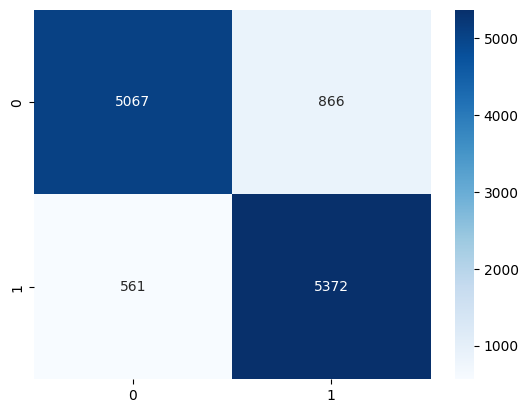

-----------------------------------------------------------------
Random Forest: F1 Score = 0.91
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5933
           1       0.89      0.92      0.91      5933

    accuracy                           0.91     11866
   macro avg       0.91      0.91      0.91     11866
weighted avg       0.91      0.91      0.91     11866



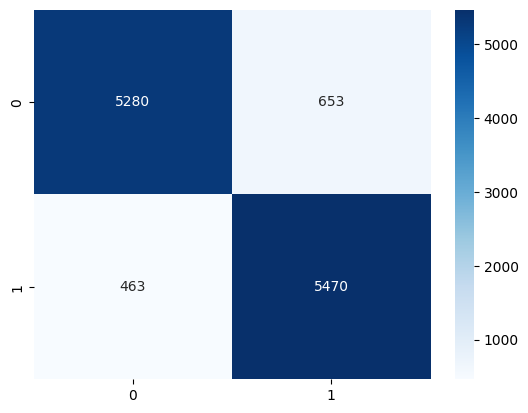

-----------------------------------------------------------------
Gradient Boosting: F1 Score = 0.90
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5933
           1       0.88      0.92      0.90      5933

    accuracy                           0.90     11866
   macro avg       0.90      0.90      0.90     11866
weighted avg       0.90      0.90      0.90     11866



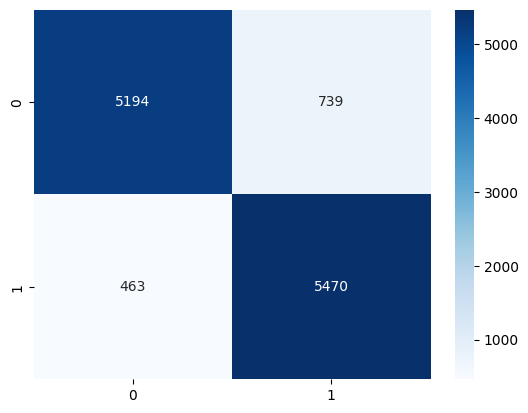

-----------------------------------------------------------------
K-Nearest Neighbors: F1 Score = 0.89
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5933
           1       0.88      0.90      0.89      5933

    accuracy                           0.89     11866
   macro avg       0.89      0.89      0.89     11866
weighted avg       0.89      0.89      0.89     11866



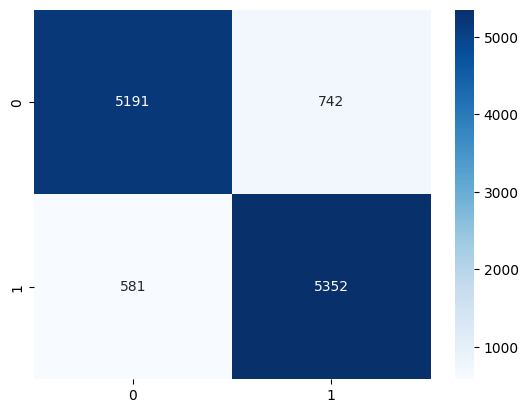

-----------------------------------------------------------------
Support Vector Machine: F1 Score = 0.88
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5933
           1       0.86      0.92      0.89      5933

    accuracy                           0.88     11866
   macro avg       0.89      0.88      0.88     11866
weighted avg       0.89      0.88      0.88     11866



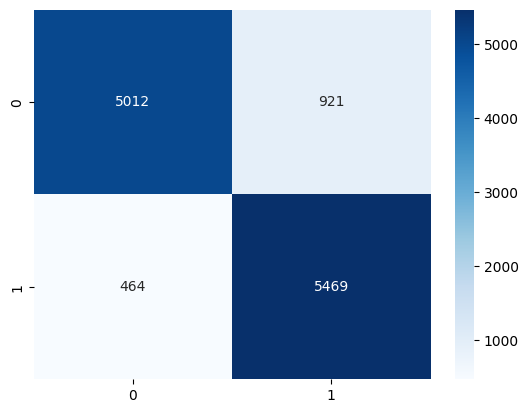

-----------------------------------------------------------------
xgboost: F1 Score = 0.91
xgboost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5933
           1       0.89      0.92      0.91      5933

    accuracy                           0.91     11866
   macro avg       0.91      0.91      0.91     11866
weighted avg       0.91      0.91      0.91     11866



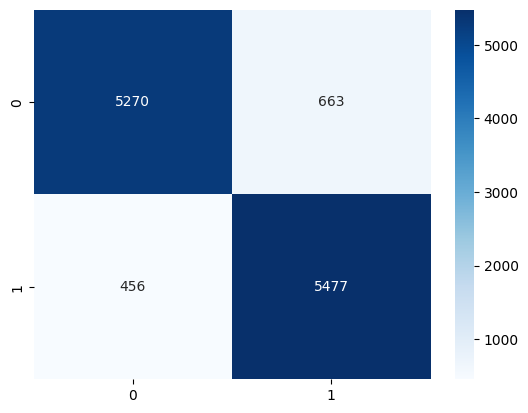

-----------------------------------------------------------------


In [29]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.show()
    print('-----------------------------------------------------------------')

# **DNN**
-----

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.optimizers import SGD

2024-08-18 04:39:31.932403: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 04:39:31.932516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 04:39:32.064894: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu',))
model.add(Dense(1, activation='sigmoid'))

In [32]:
ES = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [33]:
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=[F1Score])

In [34]:
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[ES,RL])

Epoch 1/150
 88/347 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.6644 - loss: 0.5795

I0000 00:00:1723955987.298987     101 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


347/347 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - f1_score: 0.6675 - loss: 0.4436 - val_f1_score: 0.6667 - val_loss: 0.9411 - learning_rate: 0.0010
Epoch 2/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6664 - loss: 0.2984 - val_f1_score: 0.6667 - val_loss: 0.2659 - learning_rate: 0.0010
Epoch 3/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6647 - loss: 0.2664 - val_f1_score: 0.6667 - val_loss: 0.2476 - learning_rate: 0.0010
Epoch 4/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6662 - loss: 0.2499 - val_f1_score: 0.6667 - val_loss: 0.2344 - learning_rate: 0.0010
Epoch 5/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6611 - loss: 0.2364 - val_f1_score: 0.6667 - val_loss: 0.2262 - learning_rate: 0.0010
Epoch 6/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6634 - loss: 0.2237 - val_f1_score: 0.6667 - val_loss: 0.2217 - learning_rate: 0.0010
Epoch 7/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6634 - loss: 0.2207 - val_f

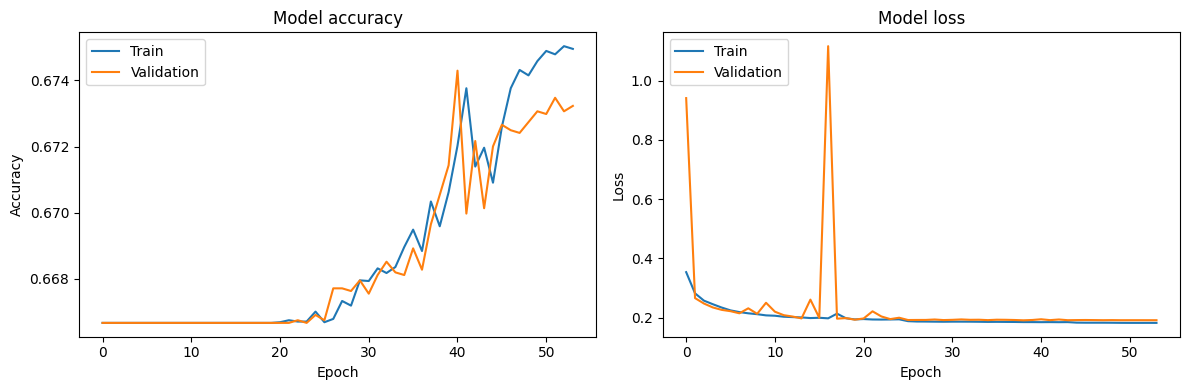

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [36]:
model.evaluate(X_test, y_test)

371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6680 - loss: 0.1964


[0.19721564650535583, 0.6702439785003662]